# Homework 2
#### EE-556 Mathematics of Data - Fall 2024

This homework covers Lectures 8-12. Please take a look at the material for the context and notation.

In this homework we will study minimax problems. We will begin with some theoretical analysis and in a second part you will implement a Wasserstein Generative Adversarial Network (WGAN). 

These notebooks should expose you to the fundamentals of GAN training at a basic level, as well as some of the theory behind it.

## 1. Minimax problems - 65 points

### 1.1 Theoretical recap: stationary points and convergence in minmax games - 25 points

Consider a stylized function $f:\mathbb{R}^4 \to \mathbb{R}$ with variables $x_1,x_2,y_1,y_2$, we denote by
$x=(x_1,x_2) \in \mathbb{R}^2$, $y=(y_1,y_2) \in \mathbb{R}^2$, the function has the form of
$
f(x,y) = (a x - b)^\top (a y - c), \quad a \neq 0, \; b,c \in \mathbb{R}^2.
$


__(1)__ (5 points) Write down the first-order stationary points of $f$, and
        classify them as local minimum, local maximum, or saddle point by
        inspecting its Hessian.




### Step 1: First-order stationary points
Compute gradients with respect to x and y as follows: 
$$
\nabla_x f(x,y) = \frac{\partial}{\partial_x} \left[ (ax-b)^\top (ay-c)\right] = a^\top (ay-c),
$$
$$
\nabla_y f(x,y) = \frac{\partial}{\partial_y} \left[ (ax-b)^\top (ay-c)\right] = a^\top (ax-b)
$$
Now first-order stationarity requires 
$$
\nabla_x f = a^\top (ay-c) = 0, \hspace{1cm} \nabla_y f = a^\top (ax-b) = 0
$$
Solving these linear equations and defining the matrix $A := a^\top a \in \mathbb{R}^{2 \times 2}$ yields
$$
a^\top a y = a^\top c \Longleftrightarrow Ay = a^\top c,
$$
$$
a^\top a x = a^\top b \Longleftrightarrow Ax = a^\top b,
$$

$\textbf{Case 1: A invertible}$
If $A = a^\top a$ is invertible (i.e. has full column rank), the unique critical point is 
$$
x^* = A^{-1}a^\top b, \hspace{1cm} y^* = A^{-1}a^\top c
$$

$\textbf{Case 2: A singular}$
If $A$ is singular, the set of critical points are given by the affine sets
$$
\{x:Ax=a^\top b \} \times \{y:Ay=a^\top c \},
$$
i.e. any pair satisfying those linear constraints are stationary. 

### Step 2: Classify via Hessian
We need to find the second derivatives to compute the Hessian.
Pure second derivatives vanish:
$$
\nabla_{xx} f = 0, \hspace{1cm} \nabla_{yy} f = 0.
$$
Cross-derivatives are constant and symmetry of mixed partials yields the same second derivate for both cross-derivatives: 
$$
\nabla_{xy} f = \frac{\partial}{\partial_y} \bigl( a^\top (ay-c) \bigr) = a^\top a = A = \nabla_{yx} f
$$
Hence the full Hessian is
$$
H = \begin{pmatrix}0 & A\\A & 0\end{pmatrix}.
$$
$\textbf{Eigenstructure of H}$: Because $A = a^\top a$ is positive semidefinite, the block matrix $H$ has both positive and negative eigenvalues, unless $A=0$, which cannot occur by the assumption $a≠0$. In fact, for any eigenpair $(v,\lambda)$ of $A$ with $\lambda \geq 0$, one can check that $[ v;\pm v ]$ are eigenvectors of $H$ with eigenvalues $\pm \lambda$. Therefore $H$ is indefinite, unless $A=0$.

### Step 3: Conclusion
The Hessian is indefinite at every point, so any critical point is a saddle point.

__(2)__ (5 points) Find the solution $(x^\star,y^\star)$ to the
        minimax problem $\min_x \max_y f(x, y)$. You can quantify the solution
        by using the following saddle point inequality:  $f(x^\star, y^\star)
        \geq f(x^\star, y)$ and $f(x^\star, y^\star) \leq f(x, y^\star)$, for
        all $x, y$.
        
**HINT:** $(x^\star, y^\star)$ can only be one of the critical points you found in (1), just evaluate $f$ at every place in the inequalities to check the optimality!




Let again $A:= a^\top a$ be the symmetric positive semidefinite matrix from (1). From (1), first-order stationartiy gives the candidate
$$
x^* = A^{-1} a^\top b, \hspace{1cm} y^* = A^{-1} a^\top c,
$$
when A is invertible; more generally, any x,y satisfying
$$
Ax = a^\top b, \hspace{1cm} Ay = a^\top c
$$
are critical points. 

We will show that any such pair $(x^*,y^*)$ is a saddle point of the min-max problem, i.e., it satisfies the saddle point inequalities for all x,y. 

$\textbf{Step 1: Rewrite f at fixed x or y}$ 

For fixed $x$, $f(x,y)$ is affine in $y$: 
$$
f(x,y) = (ax-b)^\top (ay-c) = (ax-b)^\top ay - (ax-b)^\top c.
$$
Its gradient w.r.t. y is $\nabla_y f = a^\top (ax-b) = Ax - a^\top b$.

For fixed y, $f(x,y)$ is affine in x: 
$$
f(x,y) = (ax-b)^\top (ay-c) = x^\top a^\top (ay-c) - b^\top (ay-c).
$$
Its gradient w.r.t. y is $\nabla_x f = a^\top (ay-c) = Ay - a^\top c$.

$\textbf{Step 2: Check Optimality}$
- Right inequality $f(x^*,y^*) \leq f(x,y^*)$ for all $x$
    - Since $\nabla_x f (x,y^*) = Ay^* - a^\top c = 0$, the function $x \rightarrow f(x,y^*)$ is affine with zero gradient, hence constant in $x$.
    - Therefore $f(x,y^*) = f(x^*,y^*)$ for all $x$, which implies $f(x^*,y^*) \leq f(x,y^*)$ holds with equality for all $x$. 
- Left inequality  $f(x^*,y) \leq f(x^*,y^*)$ for all $y$
    - Since $\nabla_y f(x^*,y) = Ax^* - a^\top b = 0$, the function $y \rightarrow f(x^*,y)$ is affine with zero gradient, hence constant in $y$. 
    - Therefore $f(x^*,y) = f(x^*,y^*) for all $y$, which implies $f(x^*,y) \leq f(x^*,y^*)$ holds with equality for all $y$.

$(x^*,y^*)$ satisfies the saddle point inequalities; equivalently, it is a saddle point of the convex-concave game and solves the minimax problem
$$
\min_x \max_y f(x,y) = f(x^*,y^*).
$$

$\textbf{Step 3: Value at the saddle}$

Using $Ax^* = a^\top b$ and $Ay^* = a^\top c$, 
$$
f(x^*,y^*) = (ax^*-b)^\top(ay^*-c).
$$
If a is invertible (full column rank of a), this reduces to 
$$
ax^* = Proj_{col(a)}(b), \hspace{1cm} ay^* = Proj_{col(a)}(c), 
$$
where $Proj_{col(a)}(v)$ is the orthogonal projection of the vector $v$ onto the column space of the matrix $a$. So 
$$
f(x^*,y^*) = (Proj_{col(a)}(b)-b)^\top (Proj_{col(a)}(c) - c) = -(b_{\perp})^\top(c_{\perp}),
$$
where $b_\perp, c_\perp$ are the components orthogonal to $col(a)$. In particular, if $b,c \in col(a)$, then $f(x^*,y^*) = 0$.


__(3)__ (15 points) One possible attempt at finding this solution via iterative
        first-order methods is to perform gradient updates on the variables $x$
        and $y$. More precisely for $\gamma > 0$ consider the simultaneous gradient
        descent/ascent updates
        
\begin{equation}
    x^{k+1} = x^k - \gamma \nabla_x f(x^k, y^k), \qquad
    y^{k+1} = y^k + \gamma \nabla_y f(x^k, y^k) \nonumber
\end{equation}
Show that the sequence of iterates $\{x^k, y^k \}_{k=0}^\infty$ starting
from any point $(x^0, y^0) \neq (x^\star, y^\star)$ diverges, for any $\gamma > 0$.
Find the rate at which the distance from 
$(x^\star,y^\star)$ to the sequence $\{x^k, y^k \}$ grows as the number of iterations $k$ increases.

**HINT:** Define $d_k^2=||(x^k,y^k)-(x^\star, y^\star)||_2^2$ as the sequence of squared distances to the optimum. If you find a formula for how $d_{k+1}$ depends on $d_k$ using the exact gradient updates for our $f$, you can easily argue for the divergence and the rate.

$\textbf{Step 1: Rewrite and Center}$

Using the gradient form and definition $A := a^\top a$ from (1) and (2), the sGDA updates become
$$
x^{k+1} = x^k - \gamma A y^k + \gamma a^\top c, \hspace{1cm} y^{k+1} = y^k + \gamma A x^k - \gamma a^\top b. 
$$
Let $(x^*,y^*)$ be any stationary point satisfying $Ax^* = a^\top b$ and $Ay^* = a^\top c$. 

Center the iterates: 
$$
u^k := x^k - x^*, \hspace{1cm} v^k := y^k - y^*.
$$
Subtract the fixed-point equalities from the updates to eliminate the constant terms (the affine part). We obtain the homogenous linear recurrence:
$$
\begin{bmatrix}
    u^{k+1} \\
    v^{k+1}
\end{bmatrix}
=
\underbrace{\begin{bmatrix}
    I & -\gamma A \\
    \gamma A & I
\end{bmatrix}}_{=:M_\gamma}.
$$
Thus the dynamics around the saddle are governed by the block matrix $M_\gamma$.

$\textbf{Step 2: Spectrum and divergence}$

Consider the eigenpair $(\lambda, w)$ of $A$ with $\lambda \geq 0$ and nonzero eigenvector $w$. Restrict the recurrence to the 2D subspace spanned by $[w;0]$ and $[0;w]$. In this subspace, $M_\gamma$ acts like the $2 \times 2$ matrix 
$$
B_\lambda =
\begin{bmatrix}
    1 & -\gamma \lambda \\
    \gamma \lambda & 1
\end{bmatrix}.
$$
The eigenvalues of $B_\lambda$ are the roots of 
$$
\mu^2 - 2\mu + (1+ \gamma^2 \lambda^2) = 0
$$
i.e., 
$$
\mu_\pm = 1 \pm i \gamma \lambda,
$$
with modulus
$$
|\mu_\pm| = \sqrt((1)^2 + (\gamma \lambda)^2) = \sqrt(a + \gamma^2 \lambda^2).
$$
- If $\lambda > 0$ (i.e. has positive eigenvalue, which is the generic case since $a \neq 0$), then for any $\gamma>0$,
    $$
    |\mu_\pm| = \sqrt(1+\gamma^2\lambda^2)>1.
    $$
    Hence $M_\gamma$ has eigenvalues with modulus larger than 1. The linear recurrence map expands along those directions, leading to divergence for any initialization not exactly at the fixed point.
- If $A = 0$ (equivalently $a=0$), then $f$ is constant, gradients vanish, and the updates are trivial. This degenerate case is excluded by $a \neq 0$.

Therefore, for any $\gamma > 0$ and any initialization $(u^0,v^0) \neq (0,0)$, the iterates diverge.

$\textbf{Step 3: Growth rate of the distance to the saddle}$

Define the squared distance to $(x^*,y^*)$:
$$
d_k^2 := |u^k|_2^2 + |v^k|_2^2 = 
\left\|
\begin{bmatrix}
    u^k \\
    v^k
\end{bmatrix}
\right\|.
$$
From the recurrence, 
$$
\begin{bmatrix}
u^k \\
v^k
\end{bmatrix}
= M_\gamma^k
\begin{bmatrix}
u^0 \\
v^0
\end{bmatrix}.
$$
The norm grows (along the component with $\lambda >0$) at least geometrically with factor equal to the spectral radius in that invariant 2D subspace: 
$$
\left\|
    \begin{bmatrix}
    u^{k}\\v^{k}
    \end{bmatrix}
\right\|_2
\ \sim\ \big(\sqrt{1+\gamma^2\lambda^2}\big)^{\,k}\,
\left\|
    \begin{bmatrix}u^{0}\\v^{0}
    \end{bmatrix}
\right\|_2.
$$
In particular, along the most expanding eigendirection (associated with $\lambda_{\max}(A)$), 
$$
d_k \gtrsim (\sqrt(1+ \gamma^2 \lambda_{\max}(a)^2))^k d_0,
$$
so the distance grows exponentially with rate
$$
\rho(\gamma) = \sqrt(1+\gamma^2 \lambda_{\max}(A)^2) > 1.
$$
Equivalently, we can write the divergence in squared distance as 
$$
d_k^2 \gtrsim (a + \gamma^2 \lambda_{\max}(A)^2)^k d_0^2.
$$

$\textbf{Step 4: Conclusion}$

- The sGDA iterates for the bilinear saddle $f(x,y) = (ax-b)^\top(ay-c)$ diverge for any step size $\gamma >0$ unless initiatlized exactly at the saddle $(x^*,y^*)$.
- The divergence rate is geometric with base $\sqrt(1+\gamma^2 \lambda_{\max}(a^\top a)^2)$ (in norm), or $1+\gamma^2 \lambda_{\max}(a^\top a)^2$ (in squared norm). This is the canonical "rotating-and-expanding" failure mode of simultaneous descent-ascent in bilinear games. 

__(Optional $\star$)__ A second attempt at finding the solution via _alternating_ gradient descent ascent on $x$
        and $y$. More precisely for $\gamma > 0$ consider the update
        
\begin{equation}
    x^{k+1} = x^k - \gamma \nabla_x f(x^k, y^k), \qquad
    y^{k+1} = y^k + \gamma \nabla_y f(x^{k+1}, y^k) \nonumber
\end{equation}
Show that the sequence of iterates $\{x^k, y^k \}_{k=0}^\infty$ starting
from any point $(x^0, y^0) \neq (x^\star, y^\star)$ i) never converges, ii) but still remains bounded under certain stepsize conditions.


Note: in this example, for simplicity just consider $f:\mathbb{R}^2 \to \mathbb{R}$ with variables $x,y$, where
$x, y \in \mathbb{R}$, the function has the form of
$
f(x,y) = (a x - b) (a y - c), \quad a \neq 0, \; b,c \in \mathbb{R}.
$


**HINT**: Reduce the problem to studying a linear system.


### 1.2 A concrete example: Rock - Paper - Scissors - Lizard - Spock - 40 points

To make your previous abstract analysis more concrete, we will now look at the iconic Rock-Paper-Scissors-Lizard-Spock game. Sheldon and Leonard always like to settle their differences through a round of this game, whose rules they state as follows:

*"Scissors cuts Paper, Paper covers Rock, Rock crushes Lizard, Lizard poisons Spock, Spock smashes Scissors, Scissors decapitates Lizard, Lizard eats Paper, Paper disproves Spock, Spock vaporizes Rock, (and as it always has) Rock crushes Scissors"*

Sheldon and Leonard always pick to play Spock because "logic trumps all", it will be your task to show that this is not the optimal strategy.

We can formalize the game as follows. There are two players, the `x` player (e.g. Sheldon) and the `y` player (e.g. Leonard). There is only one single round. The players play a randomized strategy: each player chooses a probability of playing rock/paper/scissors/lizard/Spock. We look at the expected pay-off of these randomized strategies. 

In other words, the players choose an element in $\Delta_5$ the probability simplex in dimension 5. The `x` player chooses a vector $\mathbf{x} = \begin{bmatrix} \mathbf{x}_1 & \mathbf{x}_2 & \mathbf{x}_3 & \mathbf{x}_4 & \mathbf{x}_5 \end{bmatrix} \in \Delta_5$ where $\mathbf{x}_1$ is the probability of playing `Rock`, $\mathbf{x}_2$ is the probability of playing `Paper`, $\mathbf{x}_3$ is the probability of playing `Scissors`, $\mathbf{x}_4$ is the probability of playing `Lizard`, $\mathbf{x}_5$ is the probability of playing `Spock`. The `y` player chooses a vector $\mathbf{y} \in \Delta_5$ defined in the same way. 

The game designers decide that winning the game gives 1 point and a tie gives 0 points. So the expected payoff for a give choice of strategies $\mathbf{x}, \mathbf{y}$ is obtained by computing:
$$
\mathbf{x}^\top \begin{bmatrix} 0 & 1 & -1 & -1 & 1 \\ -1 & 0 & 1 & 1 & -1 \\ 1 & -1 & 0 & -1 & 1 \\ 1 & -1 & 1 & 0 & -1 \\ -1 & 1 & -1 & 1 & 0 \end{bmatrix}\mathbf{y}
$$

The `x` player wants to minimize this expected payoff and the `y` player wants to maximize it. So the problem we seek to solve is

$$
\min_{\mathbf{x} \in \Delta_5} \max_{\mathbf{y} \in \Delta_5} \mathbf{x}^\top \mathbf{M}\mathbf{y} =: f(\mathbf{x}, \mathbf{y})
$$
with $\mathbf{M} = \begin{bmatrix} 0 & 1 & -1 & -1 & 1 \\ -1 & 0 & 1 & 1 & -1 \\ 1 & -1 & 0 & -1 & 1 \\ 1 & -1 & 1 & 0 & -1 \\ -1 & 1 & -1 & 1 & 0 \end{bmatrix}$.

In the following cells, you will implement methods to solve this game and find the optimal strategies.

In [1]:
import torch
from ipywidgets import interact, SelectionSlider, fixed
from itertools import combinations
from scipy.stats import entropy
from lib.utils import *

**(1)** (2 points) Implement the objective function $f$ given two 3 dimensional vectors `x` and `y` stored as `torch.Tensor` objects.

In [2]:
M = torch.tensor([
    [ 0,  1, -1, -1,  1],
    [-1,  0,  1,  1, -1],
    [ 1, -1,  0, -1,  1],
    [ 1, -1,  1,  0, -1],
    [-1,  1, -1,  1,  0]
], dtype=torch.float32)
def f(x: torch.Tensor, y: torch.Tensor):
    return torch.dot(x, M.mv(y))

**(2)** (10 points) Implement a single step of the simultaneous gradient descent/ascent studied in question 1.1.(3). Since we are in a constrained setting, make sure you include a projection step onto the simplex. 

The function `GDA` you will implement takes in the objective function `f`, the two current strategies of the players stored in tensors `x` and `y` and a step_size. Write the function so that it modifies the variables `x` and `y` in place without returning anything.

We provide you with a function called `simplex_project` that projects a vector on the probability simplex. The function has no return value and does the projection in place. Use `Pytorch` to compute gradients automatically. 

__Hints__: Review what a call to `.backward()` on a tensor does. Review what in-place operations are like `.add_`. Think of which steps need to be in a `with torch.no_grad()` block. Remember to zero the gradients before re-using them.

In [3]:
def GDA(f, x, y, step_size):
    payoff = f(x, y)
    # Backprop to get grads: x.grad = ∇_x f, y.grad = ∇_y f
    payoff.backward()

    with torch.no_grad():
        # Gradient descent in x
        x.add_(-step_size, x.grad)
        # Gradient ascent in y
        y.add_( step_size, y.grad)

        # Project back to the probability simplex (in place)
        simplex_project(x)
        simplex_project(y)

    # Clear gradients for next call
    x.grad.zero_()
    y.grad.zero_()

We can run this algorithm initialized from Sheldon and Leonard's strategies of always playing Spock.

In [56]:
x_init = torch.tensor([0.0, 0.0, 0.0, 0.0, 1.0])
y_init = torch.tensor([0.0, 0.0, 0.0, 0.0, 1.0])

gda_x_sequence, gda_y_sequence = run_alg(GDA, f, x_init, y_init, step_size=0.05, n_iterations=2500)

We can visualize this sequence as ${4 \choose 2} = 6$ two dimensional slices since the simplex $\Delta_5$ is 4-dimensional.

In [57]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(dim_pair):
    visualize_seq(gda_x_sequence[:, dim_pairs[dim_pair]], 
                  gda_y_sequence[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
interact(visualize_seq_slice, dim_pair=SelectionSlider(
    options=range(len(dim_pairs)),
    value=0,
    description="Dim pair:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True
))

interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

<function __main__.visualize_seq_slice(dim_pair)>

To have plots that aggregate the convergence status over all 5 dimensions at the same time, let's also visualize:

- the duality gap over time: $g_k = \max_{\mathbf{y} \in \Delta_5}{f(\mathbf{x}_k,\mathbf{y})} - \min_{\mathbf{x} \in \Delta_5}{f(\mathbf{x},\mathbf{y}_k)} = \max_{i}{(\mathbf{M}^\top \mathbf{x}_k)_i} - \min_{i}{(\mathbf{M} \mathbf{y}_k)_i}$
- the distance to the optimum over time: $d_k=\sqrt{||\mathbf{x}_k-\mathbf{x}^\star||_2^2 + ||\mathbf{y}_k-\mathbf{y}^\star||_2^2}$
- the discrete entropy over time of the x and y strategies (we can do this since they are probability distributions): $H(\mathbf{x}_k)=-\sum_{i=1}^{5}{\mathbf{x}_k^{(i)}\log{\mathbf{x}_k^{(i)}}}, H(\mathbf{y}_k)=-\sum_{i=1}^{5}{\mathbf{y}_k^{(i)}\log{\mathbf{y}_k^{(i)}}}$

In [58]:
def distance_to_opt(L_x, L_y):
    return np.sqrt(np.sum((L_x - 0.2) ** 2 + (L_y - 0.2) ** 2, axis=1))

In [59]:
def duality_gap(L_x, L_y):
    return (np.max(M.numpy().T.reshape(1, 5, 5) @ L_x.reshape(-1, 5, 1), axis=(1, 2)) 
            - np.min(M.numpy().reshape(1, 5, 5) @ L_y.reshape(-1, 5, 1), axis=(1, 2)))

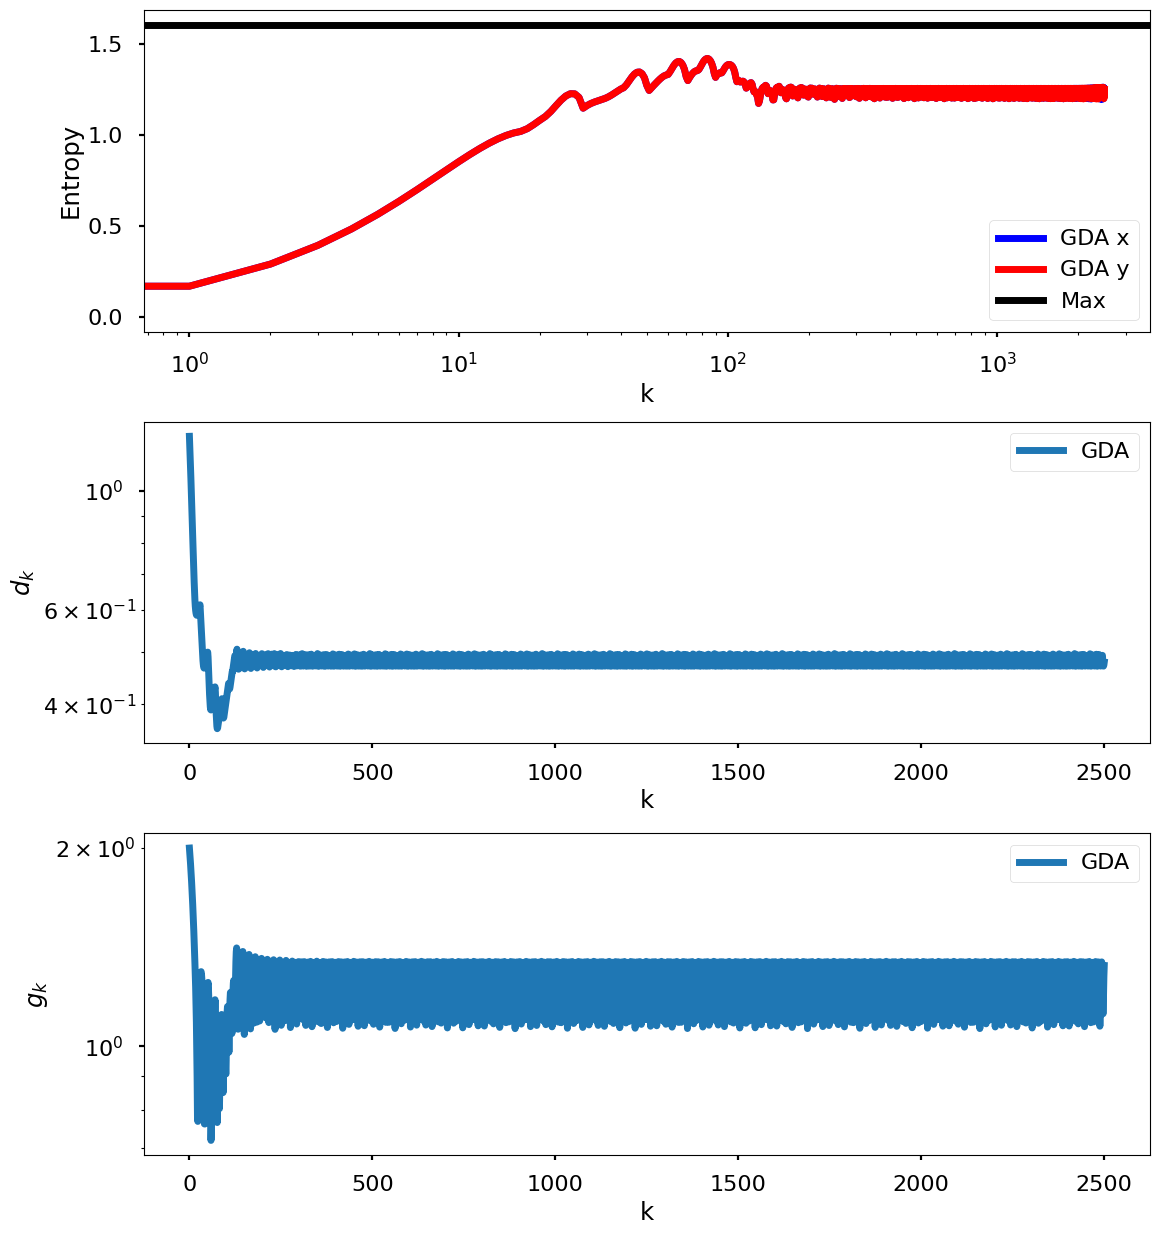

In [60]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, color='b', label="GDA x")
ax[0].plot(range(len(gda_y_sequence)), entropy(gda_y_sequence, axis=1), lw=5, color='r', label="GDA y")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()

**(3)** (3 point) What kind of behavior do you observe ? Do the iterates converge ? Play with the step_size and the number of iterations.


In summary, the sGDA does not converge for this bilinear minmax problem. It shows rotating, often expanding oscillations. Smaller step sizes only slow the instability; they don’t fix it. This matches theory and motivates using ExtraGradient/PPM-type methods for stable convergence.
- $\textbf{Behavior:}$ We can observe oscillatory “rotating” trajectories on the simplex. The iterates cycle around the equilibrium rather than settling, and the cycles often expand over time (divergence), especially with moderate or large step sizes.
- $\textbf{Convergence:}$ In bilinear games, the linerized sGDA map has eigenvalues of the form $1 \pm i \gamma \lambda$ with modulus $\sqrt(1+ \gamma^2 \lambda^2) > 1$ for any $\gamma >0$, so the iterates diverge unless initialized exactly at the equilibrium. Practically: 
    - The distance to the optimum $d_k$ tends to increase or remain large
    - The duality gap $g_k$ does not consistently decrease to $0$
    - The entropy of strategies oscillates and does not stably approach $\log(5)$
- $\textbf{Effect of step size and iterations:}$
    - Larger step size: Faster growth of oscillations (clear divergence), duality gap stays high, trajectories make expanding spirals in 2D slices
    - Very small step_size: oscillations slow down and may look bounded for a while, but they still do not converge; cycling persists with slow drift
    - More iterations: Simply reveal the long-term instability more clearly – paths don't settle at the uniform Nash, and global metrics don't consistently improve


**(4)** (4 points) As you've shown both theoretically and in practice, simultaneous Gradient Descent Ascent (sGDA) cannot solve the problem. You will now implement algorithm that can solve bilinear games. We will denote the projection onto the decision space of the x-player and y-player, $\Pi_{\mathcal X}$ and $\Pi_{\mathcal Y}$, respectively.


Let $\mathbf{z}_k = \begin{bmatrix} x_k \\ y_k \end{bmatrix}$, $\Pi(\mathbf{z})=\begin{bmatrix} \Pi_{\mathcal X}(x) \\ \Pi_{\mathcal Y}(y) \end{bmatrix}$ and $G(\mathbf{z}_k) = \begin{bmatrix} \nabla_x f(x_k,y_k) \\ -\nabla_y f(x_k,y_k) \end{bmatrix}$.

Consider the following implicit updates, which is the `Proximal Point Method ` (PPM) for solving the bilinear games:
\begin{equation}
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G(\color{red}{\mathbf{z}_{k+1}})) \nonumber
\end{equation}


Let’s first prove that the Proximal Point Method (PPM) converges in a simple case to build intuition. Consider the aforementioned stylized function $f: \mathbb{R}^2 \to \mathbb{R}$, such that $f(x, y)=xy$, and consider simplified unconstrained probelm, i.e., the projection is the identity map. Prove that PPM converges.

[Hint] Rewrite the implicit update as an explicit update in the form of $z_{k+1} = A z_{k}$ for some matrix $A$.

[Hint] A square matrix $A$ satisfies $\lim_{k \to \infty} A^k = 0$ if its spectral radius $\rho(A) < 1$, where the spectral radius is defined by
$
\rho(A) := \max_i |\lambda_i|,
$
with $\{\lambda_i\}$ denoting the  eigenvalues of $A$.

We consider the bilinear objective
$$
f(x,y) = xy,\qquad G(z)=\begin{bmatrix}\nabla_x f\\-\nabla_y f\end{bmatrix} = \begin{bmatrix}y\\-x\end{bmatrix},\quad z=\begin{bmatrix}x\\y\end{bmatrix}.
$$
The PPM with step size $\gamma>0$ and identity projection (unconstrained case) is the implicit update
$$
z_{k+1} \;=\; z_k - \gamma\, G(z_{k+1})
\;\;=\;\;
\begin{bmatrix}x_k\\y_k\end{bmatrix}
-
\gamma
\begin{bmatrix}y_{k+1}\\-x_{k+1}\end{bmatrix}
$$
Equating components, we obtain the linear system
$$
\begin{cases}x_{k+1} \;=\; x_k - \gamma\, y_{k+1},\\[3pt]
y_{k+1} \;=\; y_k + \gamma\, x_{k+1}.\end{cases}
$$
Now we solve for $(x_{k+1}, y_{k+1})$ explicitely in terms of $(x_k,y_k)$. From the first equation, 
$$
x_{k+1} + \gamma y_{k+1} = x_k.
$$
Plug into the second: 
$$
y_{k+1} = y_k + \gamma x_{k+1}
$$
Now we write this as a linear system in the unknowns $(x_{k+1},y_{k+1})$: 
$$
\underbrace{\begin{bmatrix}1 & \gamma\\-\gamma & 1\end{bmatrix}}_{:= B}
\begin{bmatrix}x_{k+1}\\y_{k+1}\end{bmatrix}
= 
\begin{bmatrix}x_{k}\\y_{k}\end{bmatrix}.
$$
Denote $z_{k+1} = B^{-1} z_k$.
We can compute the inverse by: 
$$
\det(B) = 1 + \gamma^2, \qquad B^{-1} = \frac{1}{1+\gamma^2}\begin{bmatrix}1 & \gamma\\-\gamma & 1\end{bmatrix}.
$$
Therefore, PPM update is the explicit linear map
$$
z_{k+1} \;=\; A z_k,\qquad
A \;=\; \frac{1}{1+\gamma^2} \begin{bmatrix}1 & \gamma\\-\gamma & 1\end{bmatrix}
$$

Now we analyze the spectral radius of $A$. Note that the $2\times 2$ matrix inside is a rotation-scaling form:
- The matrix $R:=\begin{bmatrix}1 & -\gamma \\ \gamma & 1\end{bmatrix}$ has eigenvalues 
    $$\lambda_\pm(R) = 1 \pm i \gamma,$$ 
    with modulus $$|1 \pm i\gamma| = \sqrt(a+\gamma^2)$$.
- Since $A = (1/(1+\gamma^2))R$, the eigenvalues of $A$ are $$\lambda_\pm(A) = \frac{1 \pm i \gamma}{1 + \gamma^2}$$. 
    Their modulus is $$|\lambda_\pm(A)| = \frac{\sqrt(1+\gamma^2)}{1+\gamma^2} = \frac{1}{\sqrt(1+\gamma^2)}<1$$ for all $\gamma >0$.

Hence the spectral radius satisfies
$$
\rho(A) = \max_{\pm} |\lambda_\pm (A) | = \frac{1}{\sqrt(1+\gamma^2)} < 1.
$$
By the hint, this implies
$$
\lim_{k \rightarrow \infty} A^k = 0 \Longrightarrow z_k = A^k z_0 \longrightarrow 0,
$$
i.e., $(x_k,y_k)$ converges linearly to the unique saddle point $(0,0)$.

**(5)** (6 points)  In general, computing the next iterate $\mathbf{z}_{k+1}$ in PPM requires you to solve a fixed point problem because we are evaluating the gradient at the unknown next iterate. As this is too costly, we circumvent this difficulty by doing an _extrapolation_ step. The idea behind `ExtraGradient` (EG) is to approximate an implicit update with a more tractable one. Define the half steps:

\begin{equation}
    \mathbf{z}_{k+1/2} = \Pi(\mathbf{z}_k - \gamma G(\mathbf{z}_k)) \nonumber
\end{equation}

These half step extrapolation variables will help us to approximate the implicit iterates. We can then write
\begin{equation}
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G(\color{green}{\mathbf{z}_{k+1/2}})) \nonumber
\end{equation}
The recursion above defines the ExtraGradient algorithm.

In [69]:
def ExtraGradient(f, x, y, step_size):
    # First gradient at current (x, y)
    payoff = f(x, y)
    payoff.backward()

    with torch.no_grad():
        # Half-step: explicit GDA then project
        x_half = x - step_size * x.grad
        y_half = y + step_size * y.grad
        simplex_project(x_half)
        simplex_project(y_half)

    # Clear grads before second gradient eval
    x.grad.zero_()
    y.grad.zero_()

    # Second gradient at the extrapolated half-step
    # Temporarily evaluate f at (x_half, y_half) with autograd
    # Create views that require grad but share storage via copy
    x_half_var = x_half.clone().requires_grad_(True)
    y_half_var = y_half.clone().requires_grad_(True)
    payoff_half = f(x_half_var, y_half_var)
    payoff_half.backward()

    with torch.no_grad():
        # Full-step: update original (x, y) using gradient at half-step, then project
        x.add_(-step_size, x_half_var.grad)
        y.add_( step_size, y_half_var.grad)
        simplex_project(x)
        simplex_project(y)

    # Cleanup grads on the temp vars
    x_half_var.grad.zero_()
    y_half_var.grad.zero_()

In [70]:
eg_x_sequence, eg_y_sequence = run_alg(ExtraGradient, f, x_init, y_init, step_size=0.1, n_iterations=2500)

In [71]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(dim_pair):
    visualize_seq(eg_x_sequence[:, dim_pairs[dim_pair]], 
                  eg_y_sequence[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
interact(visualize_seq_slice, dim_pair=SelectionSlider(
    options=range(len(dim_pairs)),
    value=0,
    description="Dim pair:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True
))

interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

<function __main__.visualize_seq_slice(dim_pair)>

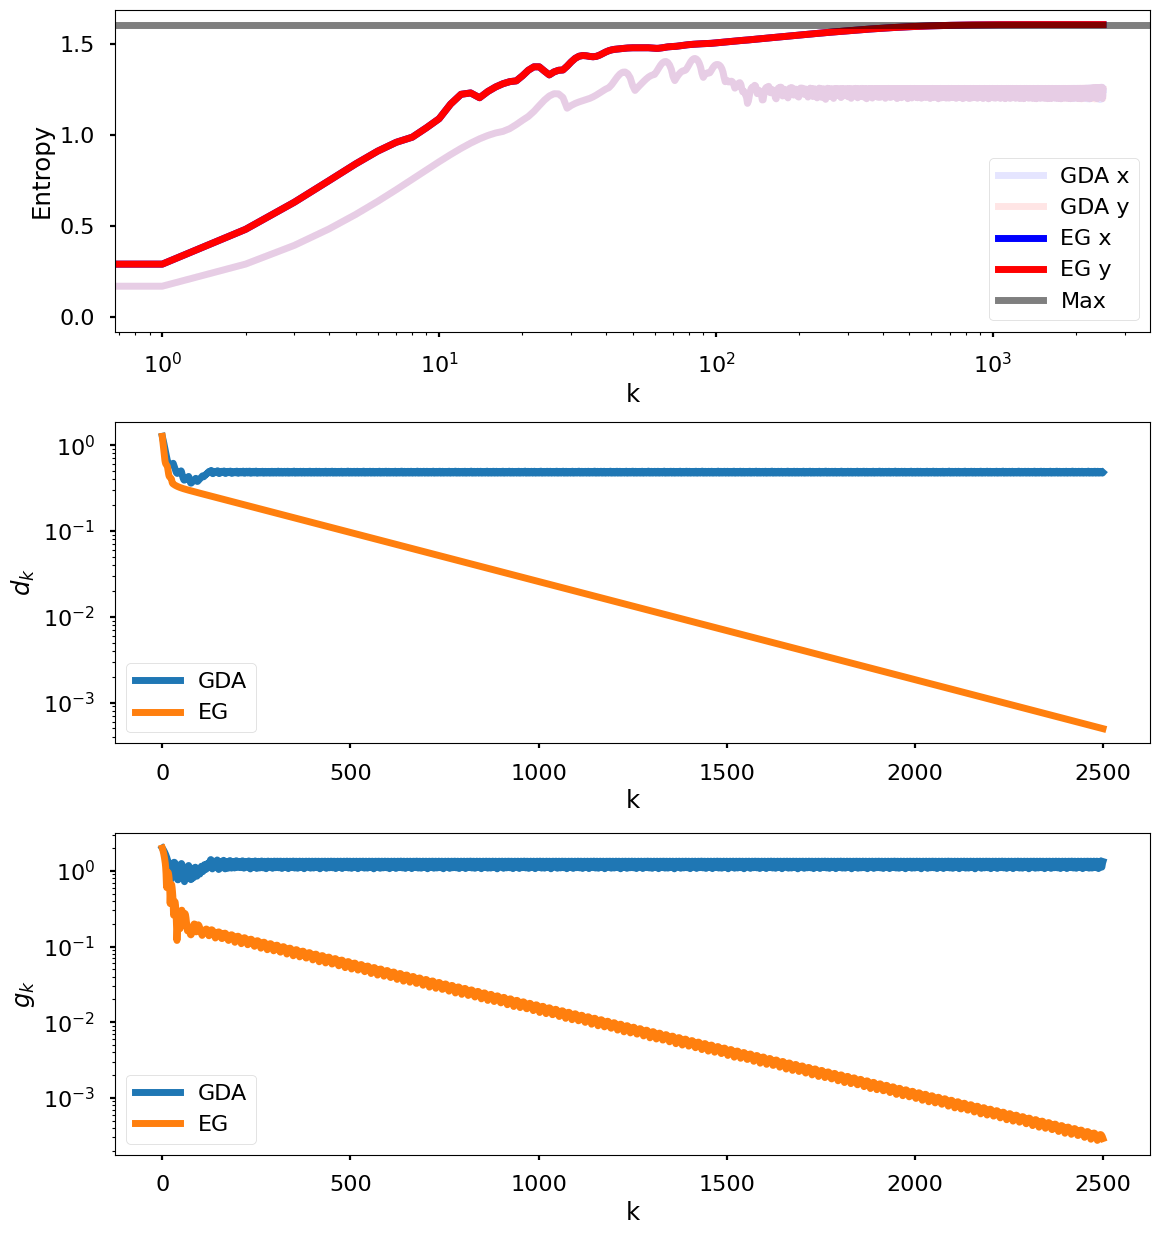

In [72]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, color='b', alpha=0.1, label="GDA x")
ax[0].plot(range(len(gda_y_sequence)), entropy(gda_y_sequence, axis=1), lw=5, color='r', alpha=0.1, label="GDA y")
ax[0].plot(range(len(eg_x_sequence)), entropy(eg_x_sequence, axis=1), lw=5, color='b', label="EG x")
ax[0].plot(range(len(eg_y_sequence)), entropy(eg_y_sequence, axis=1), lw=5, color='r', label="EG y")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, alpha=0.5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[1].plot(range(len(eg_x_sequence)), distance_to_opt(eg_x_sequence, eg_y_sequence), lw=5, label="EG")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].plot(range(len(eg_x_sequence)), duality_gap(eg_x_sequence, eg_y_sequence), lw=5, label="EG")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()

**(BONUS)** What can you observe about the optimal solution? What properties does the optimal Rock-Paper-Scissors-Lizard-Spock strategy have? Prove that extra-gradient in the bilinear case doesn't diverge like GDA. (Again, candy reward for correct answers!)




**(6)** (10 points) It turns out that we can _generalize_ the ExtraGradient method naturally by striving for a bit more accurate extrapolation. Namely, instead of always performing 1 extrapolation step updating half-iterates before the main parameter update, we can perform $m\geq 1$ fractional steps. Implement this ClairvoyantExtraGradient (CEG) method [1], with the precise update step formulas given below:

\begin{equation}
    \mathbf{z}_{k+1(\color{green}{1/m+1})} = \Pi(\mathbf{z}_k - \gamma G(\color{green}{\mathbf{z}_{k}})) \\
    \mathbf{z}_{k+1(\color{green}{2/m+1})} = \Pi(\mathbf{z}_{k+1(\color{green}{1/m+1})} - \gamma G(\mathbf{z}_{k+1(\color{green}{1/m+1})})) \\
    \vdots \\
    \mathbf{z}_{k+1(\color{green}{m/m+1})} = \Pi(\mathbf{z}_{k+1(\color{green}{m-1/m+1})} - \gamma G(\mathbf{z}_{k+1(\color{green}{m-1/m+1})})) \\
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G({\mathbf{z}_{k+1(\color{green}{m/m+1})} })) \nonumber
\end{equation}


[1] Cevher, Volkan, Georgios Piliouras, Ryann Sim, and Stratis Skoulakis. “Min-Max Optimization Made Simple: Approximating the Proximal Point Method via Contraction Maps.” In 2023 Symposium on Simplicity in Algorithms (SOSA), 192–206. Proceedings. Society for Industrial and Applied Mathematics, 2023. https://doi.org/10.1137/1.9781611977585.ch18.

In [77]:
def ClairvoyantExtraGradient(f, x, y, step_size, m=1):
    payoff = f(x, y)
    payoff = f(x, y)
    payoff.backward()

    with torch.no_grad():
        # Initialize the fractional (half) iterate with a GDA step from (x, y)
        x_frac = x - step_size * x.grad
        y_frac = y + step_size * y.grad
        simplex_project(x_frac)
        simplex_project(y_frac)

    # Clear grads before reuse
    x.grad.zero_()
    y.grad.zero_()

    # Perform m-1 additional fractional EG steps:
    # z_{k+1(t)} = Π( z_{k+1(t-1)} - γ G(z_{k+1(t-1)}) ), for t = 2..m
    for _ in range(m - 1):
        # Evaluate gradient at current fractional iterate
        x_frac_var = x_frac.clone().requires_grad_(True)
        y_frac_var = y_frac.clone().requires_grad_(True)
        payoff_frac = f(x_frac_var, y_frac_var)
        payoff_frac.backward()

        with torch.no_grad():
            x_frac = x_frac - step_size * x_frac_var.grad
            y_frac = y_frac + step_size * y_frac_var.grad
            simplex_project(x_frac)
            simplex_project(y_frac)

        # Cleanup temp grads
        x_frac_var.grad.zero_()
        y_frac_var.grad.zero_()

    # Final "clairvoyant" full step:
    # z_{k+1} = Π( z_k - γ G( z_{k+1(m/(m+1))} ) )
    # Evaluate gradient at the last fractional iterate and update original (x, y)
    x_frac_var = x_frac.clone().requires_grad_(True)
    y_frac_var = y_frac.clone().requires_grad_(True)
    payoff_final = f(x_frac_var, y_frac_var)
    payoff_final.backward()

    with torch.no_grad():
        x.add_(-step_size, x_frac_var.grad)
        y.add_( step_size, y_frac_var.grad)
        simplex_project(x)
        simplex_project(y)

    # Cleanup
    x_frac_var.grad.zero_()
    y_frac_var.grad.zero_()

In [78]:
m_values = [1, 2, 3, 5, 10, 25] # You can change this if you wish
ceg_x_sequences, ceg_y_sequences = [], []
for m in m_values:
    print("m =", m)
    step_size = 0.1 if m != 10 else 0.09 # You can change this if you wish
    ceg_x_sequence, ceg_y_sequence = run_alg(ClairvoyantExtraGradient, f, x_init, y_init, 
                                             n_iterations=2500, step_size=step_size, m=m)
    ceg_x_sequences.append(ceg_x_sequence)
    ceg_y_sequences.append(ceg_y_sequence)

m = 1
m = 2
m = 3
m = 5
m = 10
m = 25


In [79]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(L_x, L_y, dim_pair):
    visualize_seq(L_x[:, dim_pairs[dim_pair]], 
                  L_y[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
for m, ceg_x_sequence, ceg_y_sequence in zip(m_values, ceg_x_sequences, ceg_y_sequences):
    print("m =", m)
    interact(visualize_seq_slice, L_x=fixed(ceg_x_sequence), L_y=fixed(ceg_y_sequence), dim_pair=SelectionSlider(
        options=range(len(dim_pairs)),
        value=0,
        description="Dim pair:",
        disabled=False,
        continuous_update=False,
        orientation="horizontal",
        readout=True
    ))

m = 1


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 2


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 3


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 5


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 10


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 25


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

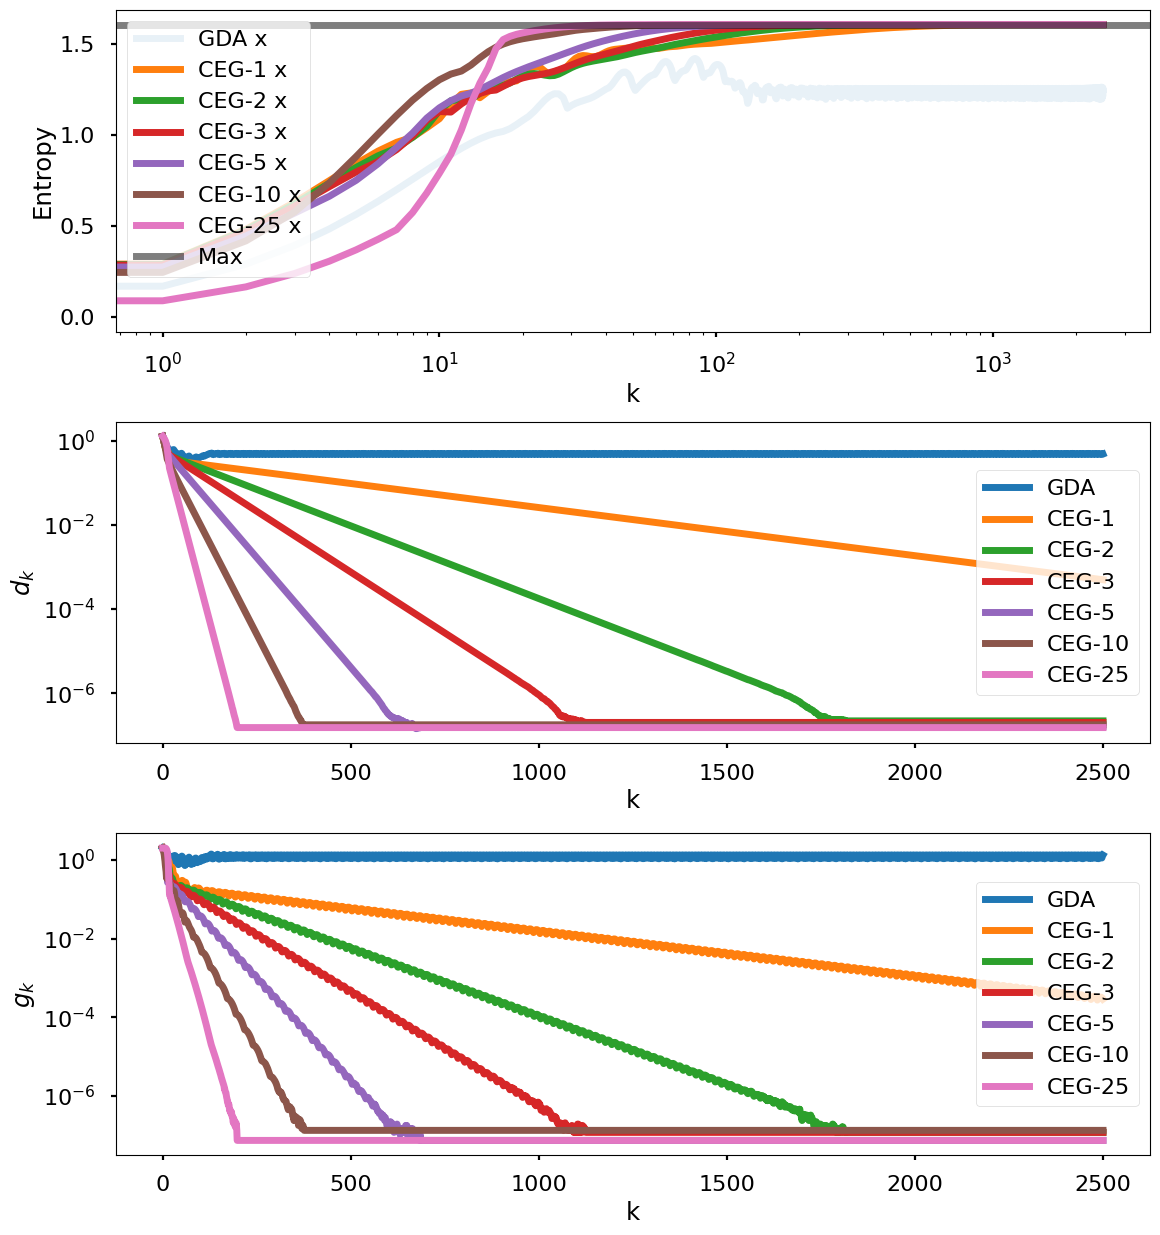

In [80]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, alpha=0.1, label="GDA x")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
for m, ceg_x_sequence, ceg_y_sequence in zip(m_values, ceg_x_sequences, ceg_y_sequences):
    ax[0].plot(range(len(ceg_x_sequence)), entropy(ceg_x_sequence, axis=1), lw=5, label=f"CEG-{m} x")
    ax[1].plot(range(len(ceg_x_sequence)), distance_to_opt(ceg_x_sequence, ceg_y_sequence), lw=5, label=f"CEG-{m}")
    ax[2].plot(range(len(ceg_x_sequence)), duality_gap(ceg_x_sequence, ceg_y_sequence), lw=5, label=f"CEG-{m}")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, alpha=0.5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()
fig.tight_layout()
plt.show()

**(7)** (5 points) Discuss what you observe for the CEG runs. How do the value of $m$ and the step size influence the convergence and the computation cost? Is there a sweet spot?




- Qualitative behavior:

    - All CEG variants are far more stable than sGDA. As m increases (more fractional/extrapolation steps), trajectories become smoother and the duality gap decays more steadily. Entropy rises toward log(5), and the distance to the uniform Nash shrinks.
    - Compared to plain EG (m = 1), larger m reduces oscillations and “overshoot,” especially at moderately large step sizes.
- Influence of m (number of fractional steps):
    - Larger m gives a better approximation to the implicit PPM update, which is a contraction for bilinear monotone problems. Practically, this means stronger stability and faster decrease of duality gap per iteration.
    - However, each iteration now computes m+1 gradient evaluations (m for fractional steps + 1 for the final “clairvoyant” step), increasing per-iteration cost linearly in m.
    - Diminishing returns: After a small m (e.g., 2–5), the improvement per extra fractional step gets smaller. Very large m mostly increases cost.
- Influence of step size:
    - With small m (e.g., m = 1), you need a more conservative step size to avoid residual oscillations.
    - With larger m, you can often use a slightly larger step size without losing stability (the extra extrapolation absorbs more of the rotation).
    - Too large a step size will still destabilize any finite-m method; you’ll see oscillations in the gap and slower or stalled convergence.
- Computation cost vs. convergence rate:
    - Per-iteration cost scales like O(m) (due to m+1 gradient evaluations).
    - Wall-clock convergence reflects a trade-off: increasing m reduces the number of iterations needed but increases time per iteration. In practice, total time to reach a target gap often decreases from m = 1 to a small m, then flattens or increases.
- Sweet spot (empirical rule of thumb):
    - A small m, typically in the range m ∈ {2, 3, 5}, tends to give the best time-to-accuracy trade-off.
    - Pair m with a modest step size (slightly larger than you would use for m = 1). For example, if EG (m = 1) is stable at step_size ≈ 0.05–0.1, then m = 3–5 can often tolerate step_size ≈ 0.1–0.15 (tune based on your plots).
    - Very large m (e.g., m ≥ 10–25) yields smoother iterates and slightly faster per-iteration gap decay but often loses in total compute due to the proportional increase in gradient calls.

Summary:

Increasing m improves stability and allows somewhat larger step sizes, reducing oscillations and accelerating convergence in iterations. But compute per iteration grows linearly in m, and gains diminish beyond a small m. A practical sweet spot is usually m ≈ 3–5 with a moderately tuned step size.